In [1]:
import sys
sys.path.append('..')
%matplotlib inline

#Convergence speed comparison according to Success Threshold parameter

In [2]:
from lib import ngdb
import numpy as np
from additional import custom_graph
import seaborn as sns

In [3]:
db=ngdb.NamingGamesDB("graph2.db")

In [4]:
def xp_cfg_thresh(i):
    return {
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':20,
            'W':20
            },
        'strat_cfg':{
            'strat_type':'success_threshold',
            'threshold_explo':i
            },
        'nbagent':20
        },
    'step':500
    }

In [5]:
nb_iter = 8
values = np.linspace(0,1,21)
Tmax = [500, 1000, 2000, 10000]
measure = 'entropycouples_norm'

In [6]:
exp_dict = {}
for v in values:
    exp_dict[v]=[]
    uuid_list=[]
    for i in range(nb_iter):
        tempexp = db.get_experiment(blacklist=uuid_list, tmax=Tmax[-1], **xp_cfg_thresh(v))
        exp_dict[v].append(tempexp)
        uuid_list.append(tempexp.uuid)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


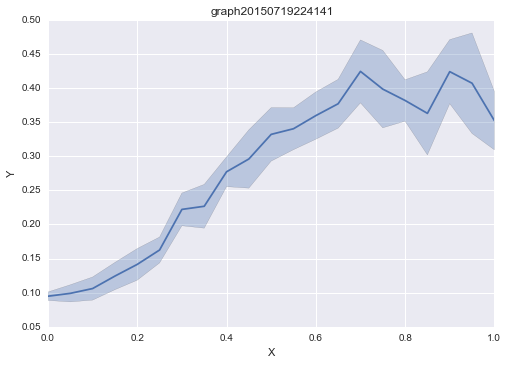

In [7]:
def get_graph(T):
    Ytemp = []
    stdtemp = []
    ind = 0
    Ttemp=[0]
    for v in values:
        templist = []
        for i in range(nb_iter):
            tempexp = exp_dict[v][i]
            tempexp.continue_exp_until(T)
            if ind == 0:
                Ttemp = exp_dict[values[0]][0]._T
                while T > Ttemp[ind]:
                    ind+=1
            templist.append(tempexp.graph(measure)._Y[0][ind])
        Ytemp.append(np.mean(templist))
        stdtemp.append(np.std(templist))
    return custom_graph.CustomGraph(values, Ytemp, stdvec=stdtemp)

graph = get_graph(Tmax[0])
graph.std = 1
graph.show()

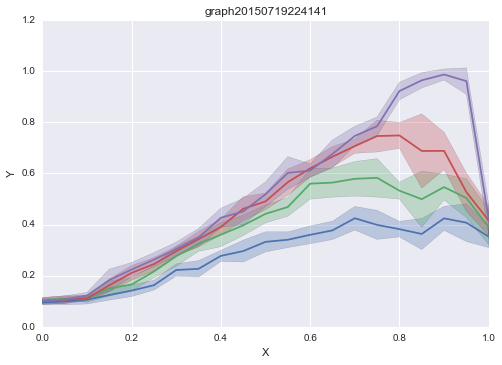

In [8]:
for T in Tmax[1:]: 
    graph.add_graph(get_graph(T))
graph.show()

In [9]:
graph._Y = list(reversed(graph._Y)) # Execute just once. This is for presentation style only (see effect on legend).
graph.stdvec = list(reversed(graph.stdvec))
Tmax = list(reversed(Tmax))

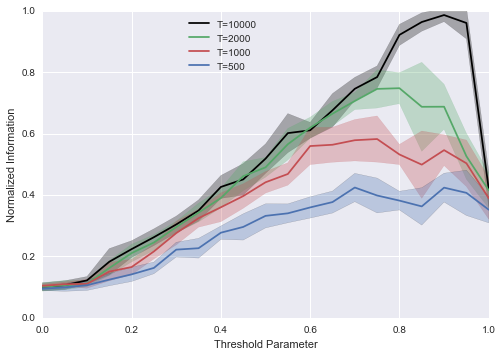

In [10]:
graph.title = ''
graph.xlabel = 'Threshold Parameter'
graph.ylabel = 'Normalized Information'
graph.ymin = [1,0]
graph.ymax = [1,1]

for i in range(len(graph.Yoptions)):
    graph.Yoptions[i] = {'label':'T={}'.format(str(Tmax[i]))}
    
graph.Yoptions[0]['color'] = 'black'
graph.Yoptions[1]['color'] = sns.color_palette()[1]
graph.Yoptions[2]['color'] = sns.color_palette()[2]
#graph.Yoptions[3]['color'] = sns.color_palette()[0]
    
graph.legendoptions['bbox_to_anchor'] = (0,0,0.5,1)

graph.show()